In [1]:
from standardInclude import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [54]:
f = r.TFile("./data/results_4D_PDF_May15.root")
#f = r.TFile("./data/results_4D_PDF_May14_ByCalo.root")

In [55]:
parsUnscaled = []
parNames = ["rmin", "rmax", "rbins", "vmin", "vmax", "vbins", "thetamin", "thetamax", "thetabins", "haddcounter"]
for pari in parNames:
    try:
        parsUnscaled.append( f.Get(pari).GetVal() )
    except:
        print(pari)
print(parsUnscaled)

[1060050.0, 1073550.0, 3150.0, -6750.0, 6750.0, 3150.0, 0.0, 942.4785766601562, 9450.0, 150.0]


In [56]:
pars = []
for pari in parsUnscaled:
    pars.append( pari/parsUnscaled[len(parsUnscaled)-1])
    #pars.append( pari/150.)
print(pars)

[7067.0, 7157.0, 21.0, -45.0, 45.0, 21.0, 0.0, 6.283190511067708, 63.0, 1.0]


In [57]:
rbins = int(pars[2])
vbins = int(pars[5])
thetabins = int(pars[8])

In [58]:
rVec = []
for rbin in range(rbins):
    hi = f.Get("he_"+str(rbin).zfill(3)+"_000_000").Clone()
    hi.Reset()
    hi.SetDirectory(0)
    rVec.append(hi.Clone("h"+str(rbin)))

In [59]:
print(rVec)
for hi in rVec:
    hi.SetDirectory(0)

[<ROOT.TH2D object ("h0") at 0x7f15fffe0440>, <ROOT.TH2D object ("h1") at 0x7fffd8265a70>, <ROOT.TH2D object ("h2") at 0x7fffd8265550>, <ROOT.TH2D object ("h3") at 0x7f15fc1a5250>, <ROOT.TH2D object ("h4") at 0x7f15f902b1b0>, <ROOT.TH2D object ("h5") at 0x7f15fe1d29e0>, <ROOT.TH2D object ("h6") at 0x7f15fe1d2df0>, <ROOT.TH2D object ("h7") at 0x7f15fe1d3610>, <ROOT.TH2D object ("h8") at 0x7f15fe1d4230>, <ROOT.TH2D object ("h9") at 0x7f15fe1d4a50>, <ROOT.TH2D object ("h10") at 0x7f15fe1d5680>, <ROOT.TH2D object ("h11") at 0x7f15fe1d5a90>, <ROOT.TH2D object ("h12") at 0x7f15fe1d62b0>, <ROOT.TH2D object ("h13") at 0x7f15fe1d6f10>, <ROOT.TH2D object ("h14") at 0x7f15fe1d7320>, <ROOT.TH2D object ("h15") at 0x7f15fe1d7ba0>, <ROOT.TH2D object ("h16") at 0x7f15fe1d8850>, <ROOT.TH2D object ("h17") at 0x7f15fe1d9bb0>, <ROOT.TH2D object ("h18") at 0x7f15fe1da0f0>, <ROOT.TH2D object ("h19") at 0x7f15fe1dab50>, <ROOT.TH2D object ("h20") at 0x7f15fe1dbbc0>]


In [60]:
for rbin in range(rbins):
    print(rbin)
    #if(rbin > 1):
    #    break
    f = r.TFile("./data/results_4D_PDF_May15.root")
    #f = r.TFile("./data/results_4D_PDF_May14_ByCalo.root")
    for vbin in range(vbins):
        for thetabin in range(thetabins):
            
            #print(f)
            hi = f.Get("he_"+str(rbin).zfill(3)+"_"+str(vbin).zfill(3)+"_"+str(thetabin).zfill(3))
            #print(hi)
            #print(rVec[rbin])
            rVec[rbin].Add(hi)
            
    f.Close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


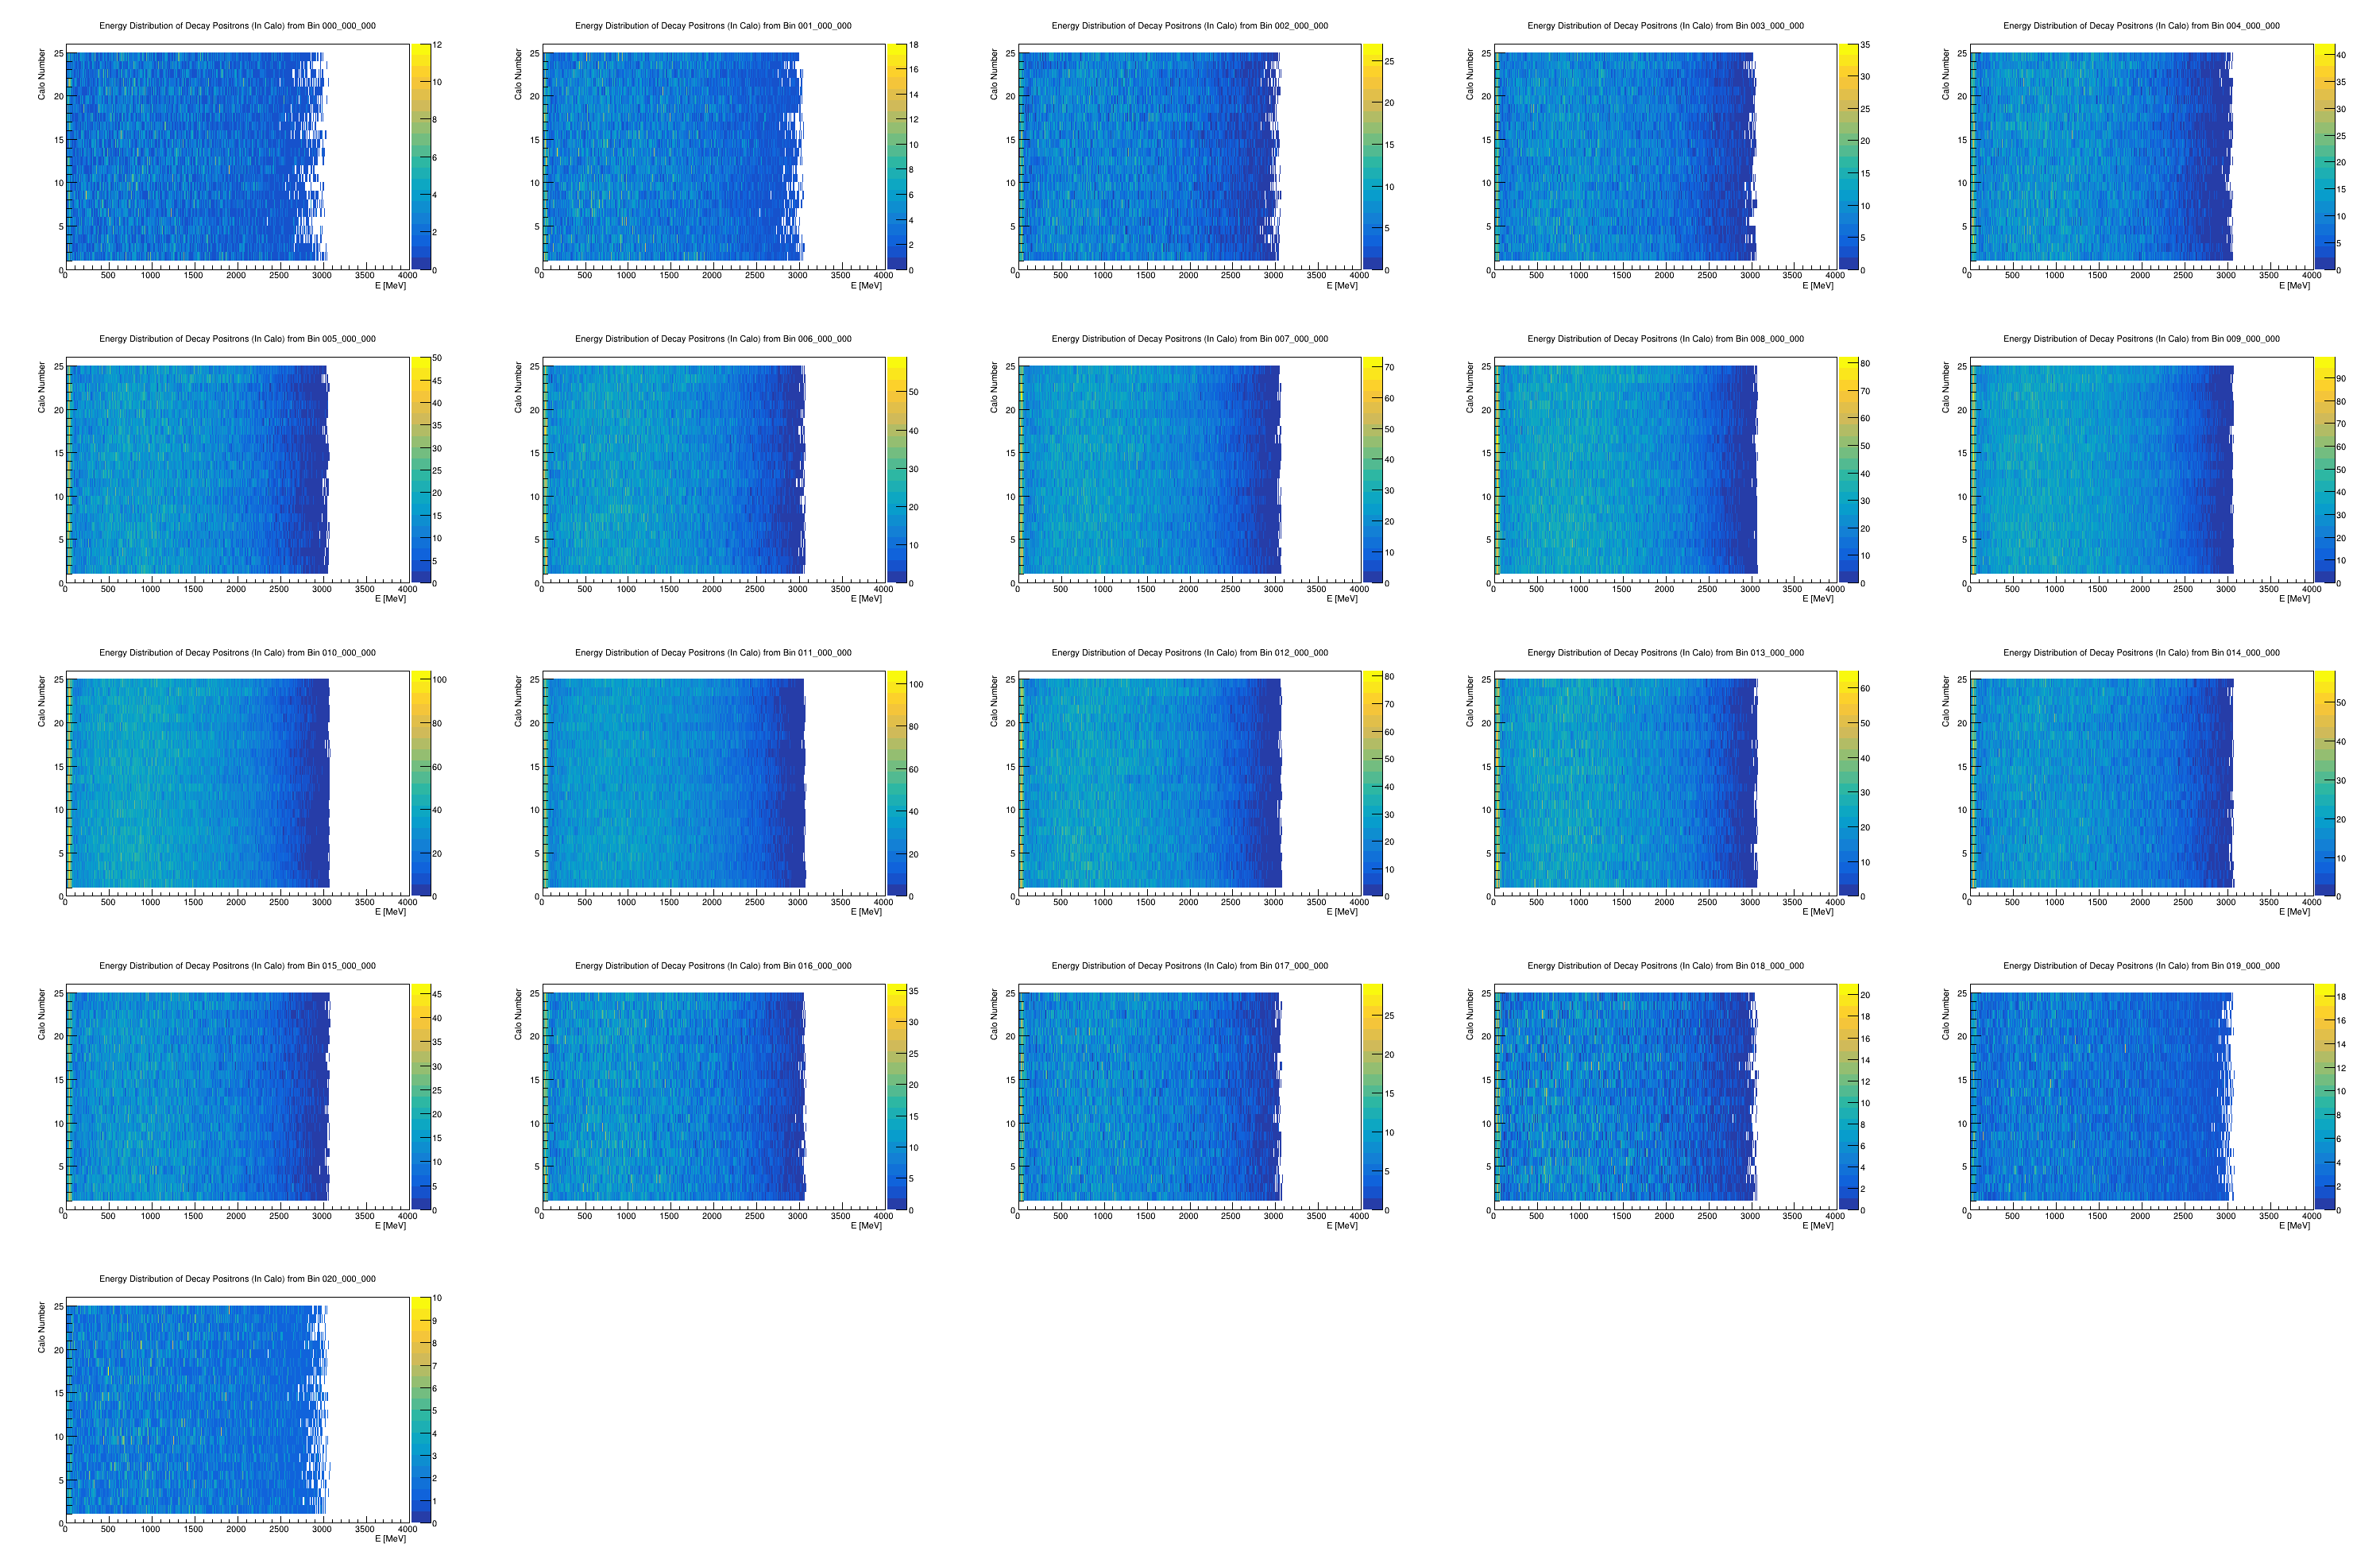

In [61]:
c = r.TCanvas("c","c",3000,2000)
c.Divide(5,5)
for i,h in enumerate(rVec):
    c.cd(i+1)
    h.Draw("COLZ")
c.Draw()

4000 4384.0
4000 9420.0
4000 14652.0
4000 20530.0
4000 26797.0
4000 34593.0
4000 43178.0
4000 53059.0
4000 65539.0
4000 77582.0
4000 82633.0
4000 76148.0
4000 63259.0
4000 49993.0
4000 40062.0
4000 31480.0
4000 23940.0
4000 17594.0
4000 12484.0
4000 7886.0
4000 3411.0
total:  758624.0


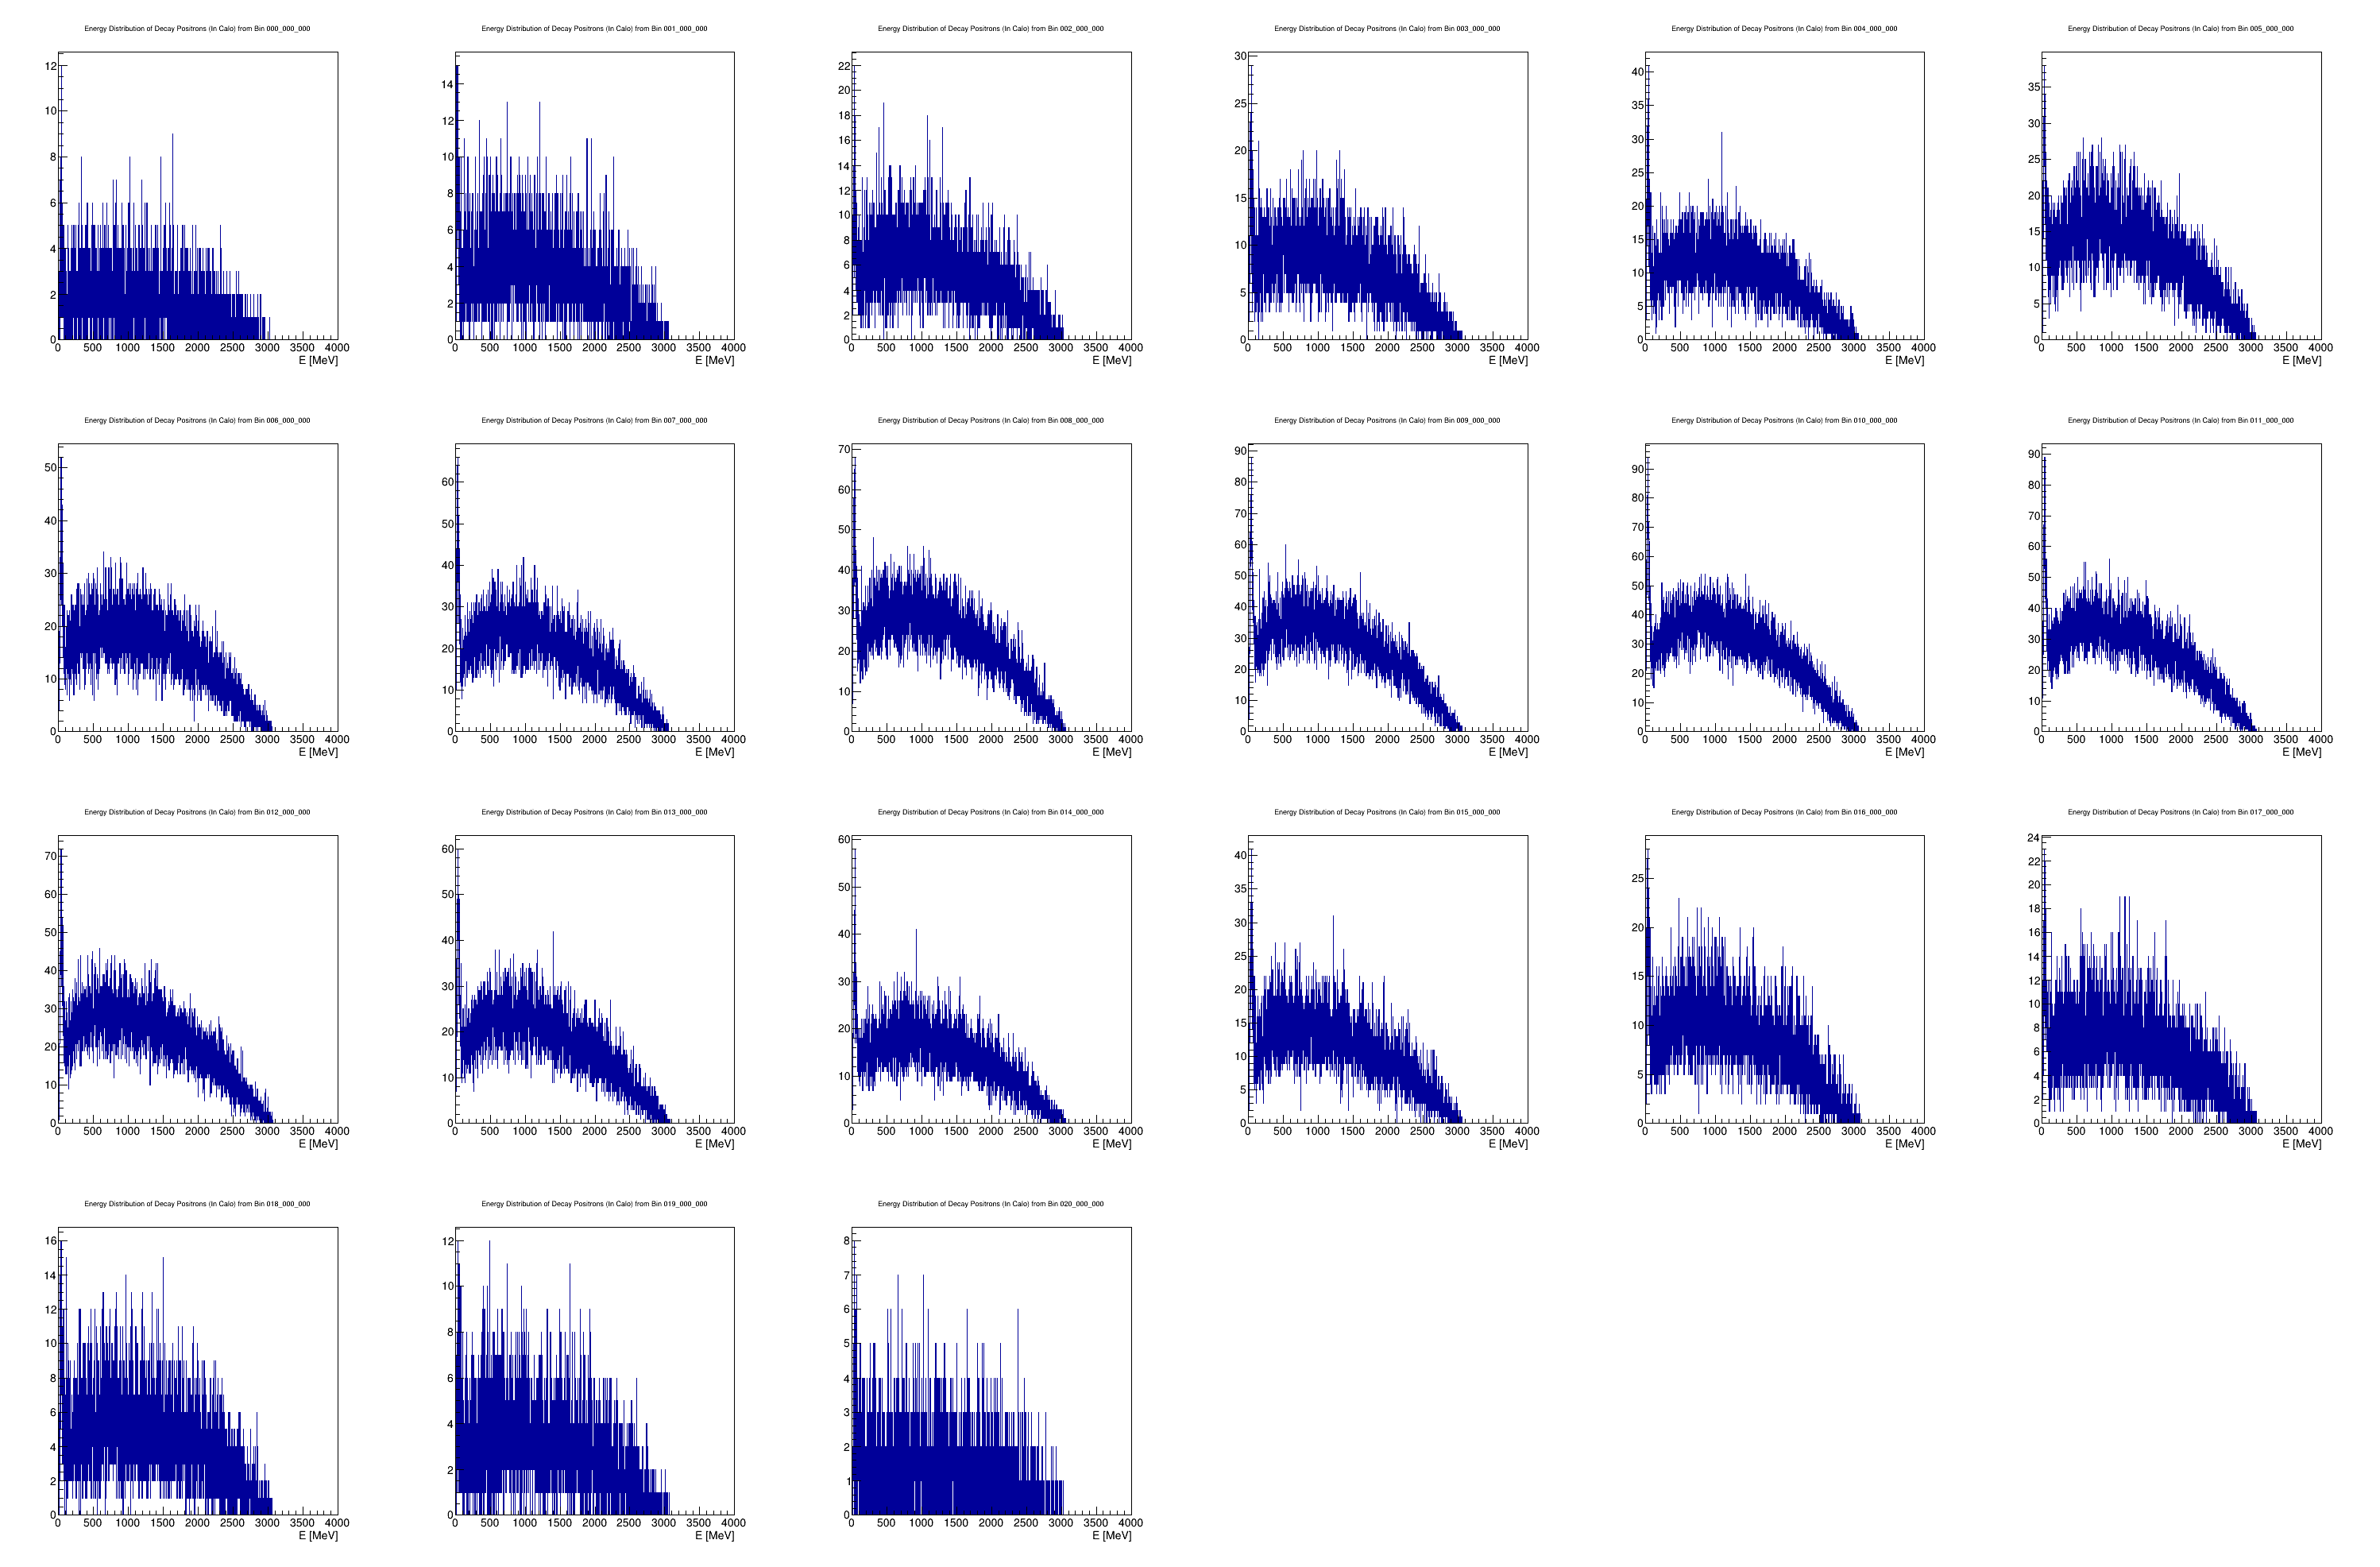

In [64]:
c = r.TCanvas("c","c",3000,2000)
c.Divide(6,4)
calo = 2
projVec = []
ding = 0
for i,h in enumerate(rVec):
    c.cd(i+1)
    hi = h.ProjectionX(str(i),calo+1,calo+1).Clone()
    #hi.Rebin(30)
    projVec.append(hi.Clone(str(i)))
    projVec[i].Draw()
    print(hi.GetNbinsX(), hi.Integral())
    ding += hi.Integral()
c.Draw()

print("total: ",ding)

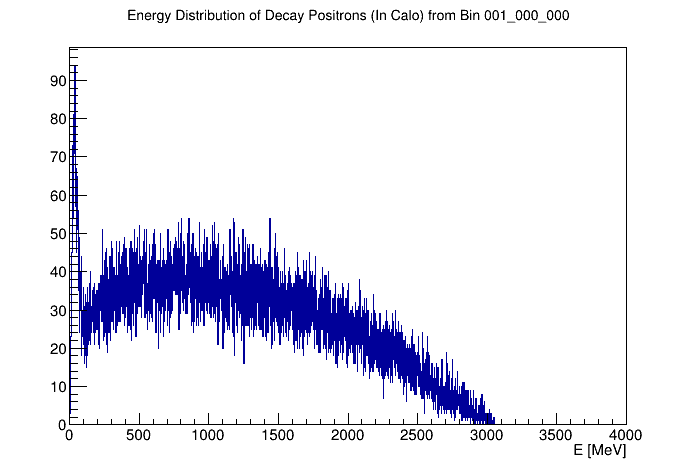

In [69]:
c = r.TCanvas()
hi = rVec[10].Clone()
hi.ProjectionX("",calo+1,calo+1).Draw()
c.Draw()